# **Experimental Comparison in R**


This notebook performs the same experiments as the Python version:
- Iris Logistic Regression experiment with timing
- Titanic Logistic Regression experiment with timing
- COVID-19 plot rendering time
- Summary table creation

The purpose of this notebook is to compare **execution time and accuracy** of R vs Python across the same tasks.

## **1. Load Required Libraries**

In [ ]:
install.packages("tidyverse")
install.packages("caret")
install.packages("e1071")
install.packages("lubridate")
install.packages("ggplot2")
install.packages("nnet")


library(tidyverse)
library(caret)
library(e1071)
library(lubridate)
library(ggplot2)
library(nnet)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in download.file(urls, destfiles, "libcurl", mode = "wb", ...):
“downloaded length 2963911 != reported length 6343443”
Warning message in download.file(urls, destfiles, "libcurl", mode = "wb", ...):
“URL 'https://cran.r-project.org/src/contrib/ggplot2_4.0.1.tar.gz': Timeout of 60 seconds was reached”


Error in download.file(urls, destfiles, "libcurl", mode = "wb", ...) : 
  download from 'https://cran.r-project.org/src/contrib/ggplot2_4.0.1.tar.gz' failed


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
“download of package ‘ggplot2’ failed”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘e1071’


The following object is masked from ‘package:ggplot2’:

    element




## **2. Helper Function for Timing**

In [ ]:
measure_time <- function(expr) {
  start <- Sys.time()
  result <- eval(expr)
  end <- Sys.time()
  runtime <- as.numeric(end - start, units = "secs")
  list(result = result, time = runtime)
}

## **3. Iris Dataset Experiment**

In [ ]:
iris_data <- datasets::iris
iris_data$Species <- as.factor(iris_data$Species)

set.seed(123)
train_index <- createDataPartition(iris_data$Species, p=0.8, list=FALSE)
train_data <- iris_data[train_index, ]
test_data  <- iris_data[-train_index, ]

iris_result <- measure_time(
  quote({
    model <- multinom(Species ~ ., data=train_data, trace=FALSE)
    preds <- predict(model, test_data)
    acc <- mean(preds == test_data$Species)
    list(model=model, accuracy=acc)
  })
)

accuracy_iris <- iris_result$result$accuracy
runtime_iris  <- iris_result$time

accuracy_iris
runtime_iris

[1] 0.9333333

[1] 0.07482505

## **4. Titanic Dataset Experiment**

In [ ]:
titanic_url <- "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic <- read.csv(titanic_url)

titanic <- titanic %>%
  select(Survived, Pclass, Sex, Age, Fare) %>%
  mutate(
    Survived = as.factor(Survived),
    Sex = as.factor(Sex)
  ) %>%
  drop_na()

set.seed(456)
train_index <- createDataPartition(titanic$Survived, p=0.8, list=FALSE)
train_data <- titanic[train_index, ]
test_data  <- titanic[-train_index, ]

titanic_result <- measure_time(
  quote({
    model <- glm(Survived ~ ., data=train_data, family=binomial)
    preds <- predict(model, test_data, type="response")
    preds_class <- as.factor(ifelse(preds > 0.5, 1, 0))
    acc <- mean(preds_class == test_data$Survived)
    list(model=model, accuracy=acc)
  })
)

accuracy_titanic <- titanic_result$result$accuracy
runtime_titanic  <- titanic_result$time

accuracy_titanic
runtime_titanic

[1] 0.7887324

[1] 0.06093597

## **5. COVID-19 Plot Rendering Time**


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Time difference of 0.4090621 secs


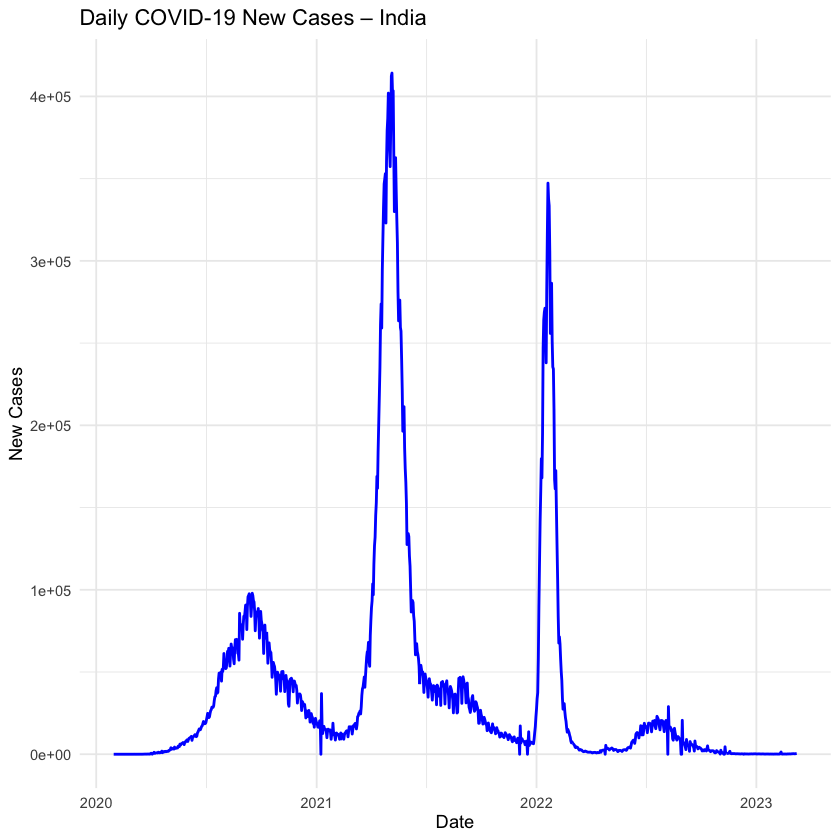

In [ ]:

library(ggplot2)
library(dplyr)
library(lubridate)


covid_url <- "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/new_cases.csv"
covid <- read.csv(covid_url)

# Convert date column
covid$date <- as.Date(covid$date)

# Select India data (you can change country if needed)
covid_india <- covid %>%
  select(date, India) %>%
  rename(new_cases = India) %>%
  filter(!is.na(new_cases))

# Measure plot rendering time

start_time <- Sys.time()

p <- ggplot(covid_india, aes(x = date, y = new_cases)) +
  geom_line(color = "blue", linewidth = 0.8) +
  labs(
    title = "Daily COVID-19 New Cases – India",
    x = "Date",
    y = "New Cases"
  ) +
  theme_minimal()

print(p)

end_time <- Sys.time()

render_time <- end_time - start_time
print(render_time)


## **6. Summary Table**

In [ ]:
results <- data.frame(
  Dataset = c("Iris", "Titanic", "COVID-19 Plot"),
  Runtime_sec = c(runtime_iris, runtime_titanic, runtime_covid_plot),
  Accuracy = c(accuracy_iris, accuracy_titanic, NA)
)

results

write.csv(results, "results_summary_R.csv", row.names=FALSE)

Dataset,Runtime_sec,Accuracy
<chr>,<dbl>,<dbl>
Iris,0.07482505,0.9333333
Titanic,0.06093597,0.7887324
COVID-19 Plot,0.01869607,NA


## **End of Experimental Comparison Notebook**